# 1. 导入所需要的的第三方数据库

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.datasets import load_diabetes

# 2. 导入sklearn库中的糖尿病病人数据

In [30]:
diabetes = load_diabetes()
X = diabetes.data

# 3. 进行标准化处理，返回值为标准化后的数据

In [31]:
from sklearn.preprocessing import StandardScaler
 
StandardScaler().fit_transform(X)

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41855058, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43655059, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06020733, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98558469,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93615545, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08871747,  0.06442552]])

# 4. 进行区间缩放，返回值为缩放到[0, 1]区间的数据

In [32]:
from sklearn.preprocessing import MinMaxScaler
 
MinMaxScaler().fit_transform(X)

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.56221737,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22244301,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49658437,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30504048,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702021,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930778,
        0.51515152]])

# 5. 进行归一化处理，返回值为归一化后的数据

In [33]:
from sklearn.preprocessing import Normalizer

Normalizer().fit_transform(X)

array([[ 0.32100597,  0.42726811,  0.52014127, ..., -0.02185454,
         0.16784162, -0.14876892],
       [-0.01166166, -0.27661579, -0.31895198, ..., -0.24471534,
        -0.4233959 , -0.57132977],
       [ 0.6574065 ,  0.39059633,  0.34258958, ..., -0.0199788 ,
         0.02207134, -0.1998475 ],
       ...,
       [ 0.42500219,  0.51642207, -0.1620822 , ..., -0.11289848,
        -0.47769422,  0.15784799],
       [-0.4486945 , -0.44049627,  0.38544135, ...,  0.26207406,
         0.43937866, -0.25586467],
       [-0.19283439, -0.18931106, -0.30969841, ..., -0.16747894,
        -0.01789509,  0.01299519]])

# 6. 通过迭代找出最佳的eps以及min_samples数值

In [34]:
res = []
for eps in np.arange(0.001,1,0.02):
    for min_samples in range(2,10):
        dbscan = cluster.DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X)
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})       
df = pd.DataFrame(res)
df
df.loc[df.outliners<35, :]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty S

,eps,min_samples,n_clusters,outliners,stats
40,0.101,2,3,23,[224 193 2]
41,0.101,3,2,25,[224 193]
42,0.101,4,2,28,[223 191]
43,0.101,5,2,33,[221 188]
48,0.121,2,1,8,[434]
...,...,...,...,...,...
395,0.981,5,1,0,[442]
396,0.981,6,1,0,[442]
397,0.981,7,1,0,[442]
398,0.981,8,1,0,[442]


# 7. 根据最佳eps及min_samples，使用DBSCAN模型对数据进行拟合并将标签加入数据集中

In [35]:
dbscan = cluster.DBSCAN(eps = 0.101, min_samples =3)
dbscan.fit(X)
diabetes['dbscan_label'] = dbscan.labels_

# 8. 通过对不同特征进行作图看出特征之间的关系

In [1]:
plt.figure(figsize=(10,10)) 
colors = [ 'g', 'r'] 
markers = ['o', 'D']
for i,l in enumerate(dbscan.labels_): 
     plt.plot(X[i][2],X[i][0],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("BMI指数")
plt.ylabel("年龄")
plt.show()

NameError: name 'plt' is not defined

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\ma

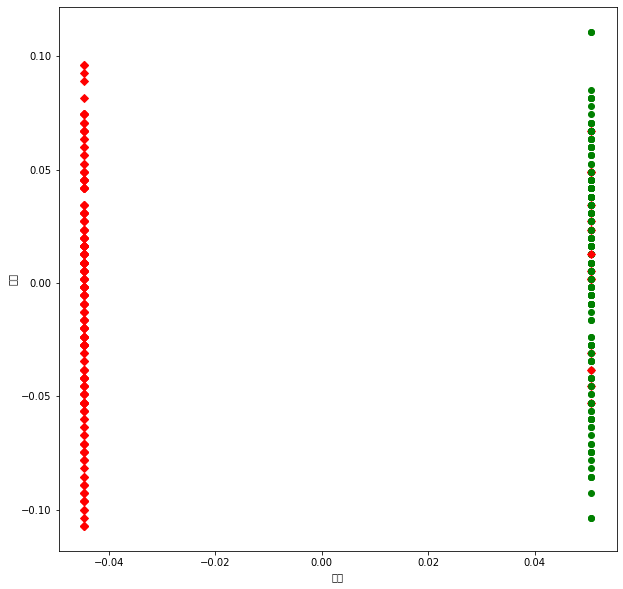

In [37]:
plt.figure(figsize=(10,10)) 
colors = [ 'g', 'r'] 
markers = ['o', 'D']
for i,l in enumerate(dbscan.labels_): 
     plt.plot(X[i][1],X[i][0],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("性别")
plt.ylabel("年龄")
plt.show()